Set `autoreload` to execute the change in `.py` files.


In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import dlib

print(f"dlib.DLIB_USE_CUDA: {dlib.DLIB_USE_CUDA}")
print(f"dlib.cuda.get_num_devices(): {dlib.cuda.get_num_devices()}")

from __utils__ import image_processing
from __utils__ import label_processing
from __utils__ import feature_processing

dlib.DLIB_USE_CUDA: True
dlib.cuda.get_num_devices(): 1


In [73]:
dataset_dir = "D:/Databases/CAS(ME)^2"
# dataset_dir = "F:/HEH/Databases/CAS(ME)^2"
# dataset_dir = "/data/disk1/heh/databases/CAS(ME)^2"

# dataset_dir = "D:/Databases/SAMM_longvideos"
# dataset_dir = "F:/HEH/Databases/SAMM_longvideos"
# dataset_dir = "/data/disk1/heh/databases/SAMM_longvideos"

test_dataset_dir = "D:/Databases/MEGC2022_testSet/CAS_Test_cropped"
# test_dataset_dir = "F:/HEH/Databases/MEGC2022_testSet/CAS_Test_cropped"
# test_dataset_dir = "/data/disk1/heh/databases/MEGC2022_testSet/CAS_Test_cropped"

# test_dataset_dir = "D:/Databases/MEGC2022_testSet/SAMM_Test_cropped"
# test_dataset_dir = "F:/HEH/Databases/MEGC2022_testSet/SAMM_Test_cropped"
# test_dataset_dir = "/data/disk1/heh/databases/MEGC2022_testSet/SAMM_Test_cropped"

images_loading = False
image_size = 128
load_cropped_images = False
# expression_type = "mae"  # macro-expression spotting
expression_type = "me"  # micro-expression spotting

## Load Images Path


In [74]:
videos_images, subjects, subjects_videos_code = image_processing.load_images(
    dataset_dir,
    images_loading=images_loading,
    image_size=image_size,
    load_cropped_images=load_cropped_images,
)

subject:  s15
subject:  s16
subject:  s19
subject:  s20
subject:  s21
subject:  s22
subject:  s23
subject:  s24
subject:  s25
subject:  s26
subject:  s27
subject:  s29
subject:  s30
subject:  s31
subject:  s32
subject:  s33
subject:  s34
subject:  s35
subject:  s36
subject:  s37
subject:  s38
subject:  s40


In [75]:
print("subjects:", subjects)
print("subjects_videos_code:", subjects_videos_code)

subjects: ['s15', 's16', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's40']
subjects_videos_code: [['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0508'], ['0101', '0102', '0401', '0402', '0502', '0505', '0507'], ['0102', '0402', '0505', '0507', '0502'], ['0502'], ['0101', '0401'], ['0101', '0102', '0402', '0503', '0508'], ['0102', '0402', '0503', '0507'], ['0101', '0401', '0402', '0502', '0507'], ['0101', '0102', '0502', '0508'], ['0101', '0102', '0401', '0503'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0502'], ['0101', '0102', '0401', '0502', '0503', '0505', '0507'], ['0101', '0401', '0402', '0502', '0503', '0505', '0507'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0102', '0402'], ['0401', '0402', '0503'], ['0102'], ['0401', '0505'], ['0101', '0402', '0502', '0505', '0507', '0508'], ['0502', '0507'], ['0401', '0502', '

In [76]:
test_videos_images, test_subjects, test_videos_name = image_processing.load_images(
    test_dataset_dir,
    images_loading=images_loading,
    image_size=image_size,
    load_cropped_images=load_cropped_images,
)

test_subject_video_code:  sub01
test_subject_video_code:  sub02
test_subject_video_code:  sub03
test_subject_video_code:  sub04
test_subject_video_code:  sub05


In [77]:
print("test_subjects:", test_subjects)
print("test_videos_name:", test_videos_name)

test_subjects: ['sub01', 'sub02', 'sub03', 'sub04', 'sub05']
test_videos_name: ['sub01', 'sub02', 'sub03', 'sub04', 'sub05']


## Load Excel


In [78]:
Excel_data = label_processing.load_excel(dataset_dir)
Excel_data.head(5)

,participant,video_name_&_expression_number,onset,apex,offset,AUs,extimated_emotion,expression_type,self-reported_emotion,video_name,video_code,subject
0,1,anger1_1,557,572,608,4+10+14+15,negative,macro-expression,anger,anger1,0401,s15
1,1,anger1_2,2854,2862,2871,38,others,macro-expression,sadness,anger1,0401,s15
2,1,anger2_1,2155,2163,0,NaN,negative,macro-expression,anger,anger2,0402,s15
3,1,anger2_2,3363,3371,3383,4+7+14,negative,macro-expression,anger,anger2,0402,s15
4,1,anger2_3,3380,3386,3407,4+14+38,negative,macro-expression,anger,anger2,0402,s15


## Load Ground Truth Labels


In [79]:
(
    clean_videos_images,
    clean_subjects_videos_code,
    clean_subjects,
    clean_subjects_videos_ground_truth_labels,
) = label_processing.load_ground_truth_labels(
    dataset_dir,
    expression_type,
    videos_images,
    subjects_videos_code,
    subjects,
    Excel_data,
)

required_videos_index:  [1, 4, 8, 9, 12, 13, 14, 16, 28, 33, 36, 37, 38, 45, 46, 47, 49, 50, 52, 54, 55, 57, 62, 64, 67, 71, 73, 74, 77, 83, 87, 91, 93]
len(clean_videos_images) = 33


In [80]:
print("len(clean_subjects): ", len(clean_subjects))
print("clean_subjects: ", clean_subjects)
print("len(clean_subjects_videos_code): ", len(clean_subjects_videos_code))
print("clean_subjects_videos_codes: ", clean_subjects_videos_code)
print(
    "len(clean_subjects_videos_ground_truth_labels): ",
    len(clean_subjects_videos_ground_truth_labels),
)
print(
    "clean_subjects_videos_ground_truth_labels: ",
    clean_subjects_videos_ground_truth_labels,
)

len(clean_subjects):  14
clean_subjects:  ['s15' 's16' 's19' 's23' 's24' 's25' 's27' 's29' 's30' 's31' 's32' 's35'
 's37' 's38']
len(clean_subjects_videos_code):  14
clean_subjects_videos_codes:  [['0102', '0502'], ['0101', '0102', '0502', '0505', '0507'], ['0402'], ['0102'], ['0401', '0507'], ['0101', '0102'], ['0101', '0102', '0401', '0502', '0503', '0507'], ['0502'], ['0101', '0401'], ['0101', '0402', '0505'], ['0401', '0502', '0503', '0508'], ['0102'], ['0402', '0508'], ['0507']]
len(clean_subjects_videos_ground_truth_labels):  14
clean_subjects_videos_ground_truth_labels:  [[[[698, 706]], [[137, 147]]], [[[551, 564]], [[269, 277]], [[322, 333]], [[395, 406], [1694, 1709], [1879, 1894]], [[1957, 1967], [2284, 2294]]], [[[1926, 1941]]], [[[330, 345], [525, 539], [726, 739]]], [[[607, 620], [962, 976], [1889, 1901], [2180, 2192], [3440, 3452]], [[1835, 1847], [1950, 1964], [3232, 3247]]], [[[112, 126]], [[995, 1007], [1007, 1016], [1017, 1033]]], [[[873, 887]], [[33, 47], [308, 316],

## Calculate `k`


In [81]:
k = label_processing.calculate_k(clean_subjects_videos_ground_truth_labels)

k (Half of average length of expression) =  6


## Debugging


In [82]:
image1 = videos_images[0][0]
image2 = videos_images[0][0 + k]

if type(image1).__name__ != "ndarray":
    # cv2 needs a str
    image1 = cv2.imread(str(image1))
    
    image2 = cv2.imread(str(image2))

image1 = image_processing.cv2_dnn_face_detect(image1)
raw_image = image1
cv2.cvtColor(raw_image, cv2.COLOR_RGB2BGR, raw_image)
raw_image = cv2.resize(raw_image, (image_size, image_size))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image1 = cv2.resize(image1, (image_size, image_size))

image2 = image_processing.cv2_dnn_face_detect(image2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image2 = cv2.resize(image2, (image_size, image_size))

### Debug Features Extraction


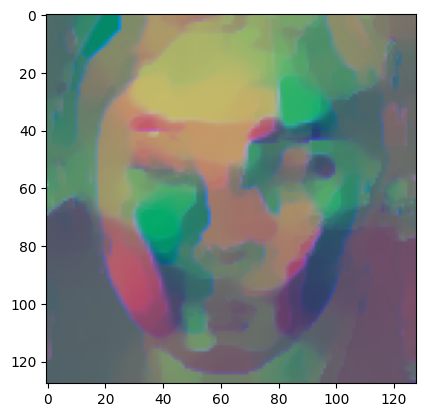

In [83]:
# Compute Optical Flow Features
# optical_flow = cv2.DualTVL1OpticalFlow_create() #Depends on cv2 version
optical_flow_create = cv2.optflow.DualTVL1OpticalFlow_create()
optical_flow = optical_flow_create.calc(image1, image2, None)
u, v = optical_flow[..., 0], optical_flow[..., 1]
optical_strain = feature_processing.compute_optical_strain(u, v)

# Features Concatenation into 128x128x3
# clean_video_image_features = np.zeros((128, 128, 3))
video_image_features = np.zeros((image_size, image_size, 3))
video_image_features[:, :, 0] = u
video_image_features[:, :, 1] = v
video_image_features[:, :, 2] = optical_strain

video_image_features_display = cv2.normalize(
    video_image_features, None, 0, 255, cv2.NORM_MINMAX
)
plt.imshow(video_image_features_display.astype("uint8"))
# cv2.cvtColor(video_image_features, cv2.COLOR_RGB2BGR, video_image_features)
# cv2.imwrite("video_image_features.png", video_image_features)

(-0.5, 127.5, 127.5, -0.5)

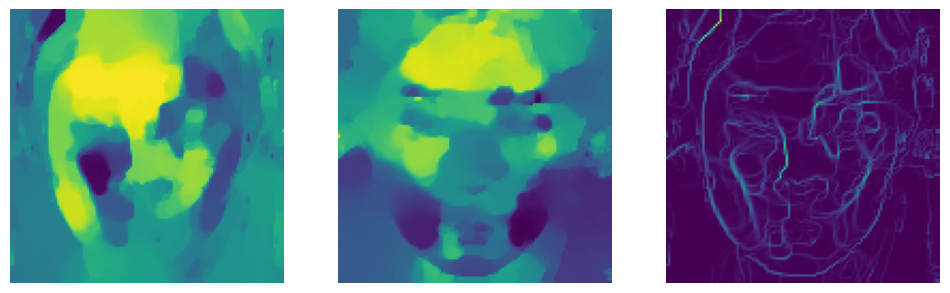

In [84]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(video_image_features_display[:, :, 0].astype("uint8"))
# plt.title("u")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(video_image_features_display[:, :, 1].astype("uint8"))
# plt.title("v")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(video_image_features_display[:, :, 2].astype("uint8"))
# plt.title("optical strain")
plt.axis('off')


### Debug Preprocess


(-0.5, 127.5, 127.5, -0.5)

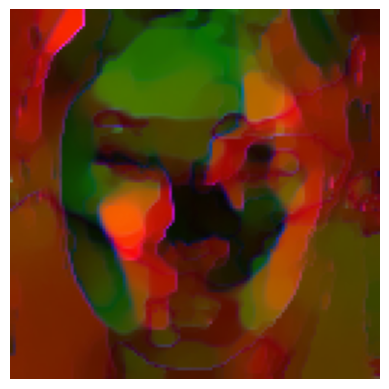

In [85]:
predictor_model = "__utils__/shape_predictor_68_face_landmarks.dat"
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
resampled_video_images_features = []
reference_image = image1
detect = face_detector(reference_image, 1)
shape = face_pose_predictor(reference_image, detect[0])

# Left Eye
x11 = max(shape.part(36).x - 15, 0)
y11 = shape.part(36).y
x12 = shape.part(37).x
y12 = max(shape.part(37).y - 15, 0)
x13 = shape.part(38).x
y13 = max(shape.part(38).y - 15, 0)
# x14 = min(shape.part(39).x + 15, 128)
x14 = min(shape.part(39).x + 15, image_size)
y14 = shape.part(39).y
x15 = shape.part(40).x
# y15 = min(shape.part(40).y + 15, 128)
y15 = min(shape.part(40).y + 15, image_size)
x16 = shape.part(41).x
# y16 = min(shape.part(41).y + 15, 128)
y16 = min(shape.part(41).y + 15, image_size)

# Right Eye
x21 = max(shape.part(42).x - 15, 0)
y21 = shape.part(42).y
x22 = shape.part(43).x
y22 = max(shape.part(43).y - 15, 0)
x23 = shape.part(44).x
y23 = max(shape.part(44).y - 15, 0)
# x24 = min(shape.part(45).x + 15, 128)
x24 = min(shape.part(45).x + 15, image_size)
y24 = shape.part(45).y
x25 = shape.part(46).x
# y25 = min(shape.part(46).y + 15, 128)
y25 = min(shape.part(46).y + 15, image_size)
x26 = shape.part(47).x
# y26 = min(shape.part(47).y + 15, 128)
y26 = min(shape.part(47).y + 15, image_size)

# ROI 1 (Left Eyebrow)
x31 = max(shape.part(17).x - 12, 0)
y32 = max(shape.part(19).y - 12, 0)
# x33 = min(shape.part(21).x + 12, 128)
x33 = min(shape.part(21).x + 12, image_size)
# y34 = min(shape.part(41).y + 12, 128)
y34 = min(shape.part(41).y + 12, image_size)

# ROI 2 (Right Eyebrow)
x41 = max(shape.part(22).x - 12, 0)
y42 = max(shape.part(24).y - 12, 0)
# x43 = min(shape.part(26).x + 12, 128)
x43 = min(shape.part(26).x + 12, image_size)
# y44 = min(shape.part(46).y + 12, 128)
y44 = min(shape.part(46).y + 12, image_size)

# ROI 3 #Mouth
x51 = max(shape.part(60).x - 12, 0)
y52 = max(shape.part(50).y - 12, 0)
# x53 = min(shape.part(64).x + 12, 128)
x53 = min(shape.part(64).x + 12, image_size)
# y54 = min(shape.part(57).y + 12, 128)
y54 = min(shape.part(57).y + 12, image_size)

# Nose landmark
x61 = shape.part(28).x
y61 = shape.part(28).y

# Remove global head movement by minus nose region
video_image_features[:, :, 0] = abs(
    video_image_features[:, :, 0]
    - video_image_features[y61 - 5 : y61 + 6, x61 - 5 : x61 + 6, 0].mean()
)
video_image_features[:, :, 1] = abs(
    video_image_features[:, :, 1]
    - video_image_features[y61 - 5 : y61 + 6, x61 - 5 : x61 + 6, 1].mean()
)
video_image_features[:, :, 2] = (
    video_image_features[:, :, 2]
    - video_image_features[y61 - 5 : y61 + 6, x61 - 5 : x61 + 6, 2].mean()
)

aligned_video_image_features = cv2.normalize(
    video_image_features, None, 0, 255, cv2.NORM_MINMAX
)
plt.imshow(aligned_video_image_features.astype("uint8"))
plt.axis('off')

upper ROI: height = 46, weight = 99
lower ROI: height = 39, weight = 47


(-0.5, 127.5, 127.5, -0.5)

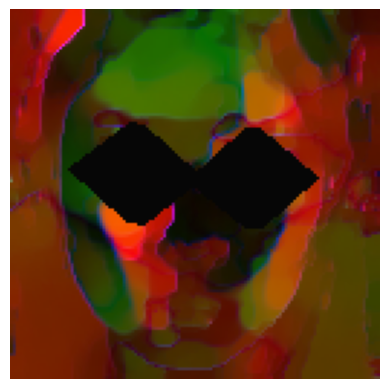

In [151]:
# Eye masking
left_eye = [
    (x11, y11),
    (x12, y12),
    (x13, y13),
    (x14, y14),
    (x15, y15),
    (x16, y16),
]
right_eye = [
    (x21, y21),
    (x22, y22),
    (x23, y23),
    (x24, y24),
    (x25, y25),
    (x26, y26),
]
cv2.fillPoly(video_image_features, [np.array(left_eye)], 0)
cv2.fillPoly(video_image_features, [np.array(right_eye)], 0)

if image_size == 128:
    # ROI Selection -> Image resampling into 42x22x3
    # cv2 resize to (weight, height)
    resampled_video_image_features = np.zeros((42, 42, 3))
    resampled_video_image_features[:21, :, :] = cv2.resize(
        video_image_features[min(y32, y42) : max(y34, y44), x31:x43, :],
        (42, 21),
    )
    resampled_video_image_features[21:42, :, :] = cv2.resize(
        video_image_features[y52:y54, x51:x53, :], (42, 21)
    )
elif image_size == 256:
    # ROI Selection -> Image resampling into [84, 84, 3]
    # cv2 resize to (weight, height)
    resampled_video_image_features = np.zeros((84, 84, 3))
    resampled_video_image_features[:42, :, :] = cv2.resize(
        video_image_features[min(y32, y42) : max(y34, y44), x31:x43, :],
        (84, 42),
    )
    resampled_video_image_features[42:84, :, :] = cv2.resize(
        video_image_features[y52:y54, x51:x53, :], (84, 42)
    )

# upper ROI
print(f"upper ROI: height = {max(y34, y44) - min(y32, y42)}, weight = {x43 - x31}")
# lower ROI
print(f"lower ROI: height = {y54 - y52}, weight = {x53 - x51}")

masked_video_image_features_display = cv2.normalize(
    video_image_features, None, 0, 255, cv2.NORM_MINMAX
)
plt.imshow(masked_video_image_features_display.astype("uint8"))
plt.axis('off')


(-0.5, 127.5, 127.5, -0.5)

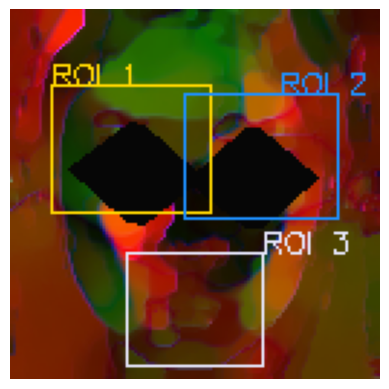

In [168]:
roi_video_image_features_display = masked_video_image_features_display.copy()
cv2.rectangle(
    roi_video_image_features_display,
    (x31, y32),
    (x33, y34),
    (255,215,0),
    1,
)
cv2.putText(
    roi_video_image_features_display,
    "ROI 1",
    (x31, y32),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.35,
    (255,215,0),
    1,
)

cv2.rectangle(
    roi_video_image_features_display,
    (x41, y42),
    (x43, y44),
    (30, 144, 255),
    1,
)
cv2.putText(
    roi_video_image_features_display,
    "ROI 2",
    (x43-20, y42),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.35,
    (30, 144, 255),
    1,
)

cv2.rectangle(
    roi_video_image_features_display,
    (x51, y52),
    (x53, y54),
    (230, 230, 250),
    1,
)
cv2.putText(
    roi_video_image_features_display,
    "ROI 3",
    (x53, y52),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.35,
    (230, 230, 250),
    1,
)

plt.imshow(roi_video_image_features_display.astype("uint8"))
plt.axis("off")

(-0.5, 127.5, 127.5, -0.5)

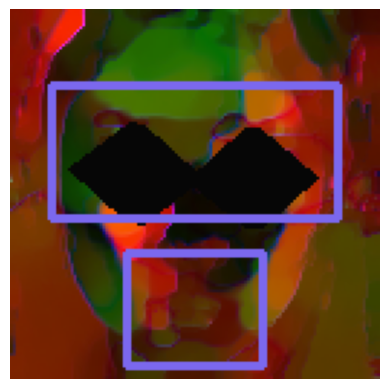

In [170]:
roi_video_image_features_display = masked_video_image_features_display.copy()
cv2.rectangle(
    roi_video_image_features_display,
    (x31, min(y32, y42)),
    (x43, max(y34, y44)),
    (123,104,238),
    2,
)
cv2.rectangle(
    roi_video_image_features_display,
    (x51, y52),
    (x53, y54),
    (123,104,238),
    2,
)
plt.imshow(roi_video_image_features_display.astype("uint8"))
plt.axis("off")

(-0.5, 41.5, 41.5, -0.5)

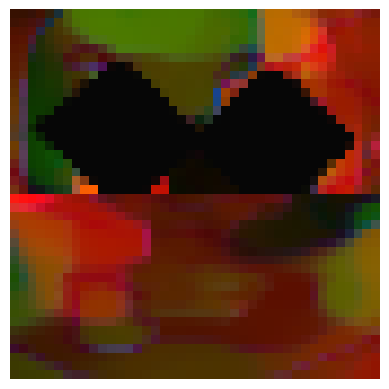

In [88]:
resampled_video_image_features_display = cv2.normalize(
    resampled_video_image_features, None, 0, 255, cv2.NORM_MINMAX
)
plt.imshow(resampled_video_image_features_display.astype("uint8"))
plt.axis('off')
# cv2.cvtColor(
#     resampled_video_image_features, cv2.COLOR_RGB2BGR, resampled_video_image_features
# )
# cv2.imwrite("pre_processed_features.png", resampled_video_image_features)

(-0.5, 127.5, 127.5, -0.5)

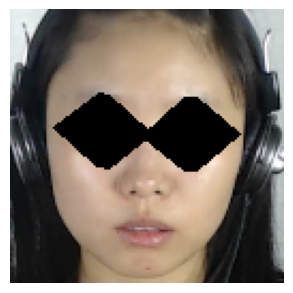

In [67]:
cv2.fillPoly(raw_image, [np.array(left_eye)], 0)
cv2.fillPoly(raw_image, [np.array(right_eye)], 0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(raw_image.astype("uint8"))
# plt.title("u")
plt.axis('off')

## Actural Features Extraction and Preprocessing


### Actural Features Extraction and Preprocessing for MEGC 2021


 `image_size = 256`


| Expression Type | CAS(ME)^2 | SAMM Long Videos |
| --- | --- | --- |
| MaE | 2200 min | ? min |
| ME | 1171 min | ? min |


 `image_size = 128`


| Expression Type | CAS(ME)^2 | SAMM Long Videos |
| --- | --- | --- |
| MaE | 803 + 115 = 918 min | 1493 + 384 = 1877 min |
| ME | 260 + 44 = 304 min | 1034 + 908 = 1942 min |


In [15]:
# features_processing.extract_features_and_preprocess(
#     clean_videos_images,
#     k,
#     expression_type,
#     clean_subjects,
#     clean_subjects_videos_code,
#     dataset_dir,
#     image_size,
# )

### Actural Features Extraction and Preprocessing for MEGC 2022


| Expression Type | CAS(ME)^3 Challenge | SAMM Challenge |
| --- | --- | --- |
| MaE | 45 min | ? min |
| ME | 77 min | 172 min |


In [16]:
# features_processing.extract_features_and_preprocess_test(
#     clean_videos_images,
#     k,
#     expression_type,
#     test_dataset_dir,
#     image_size,
# )